/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


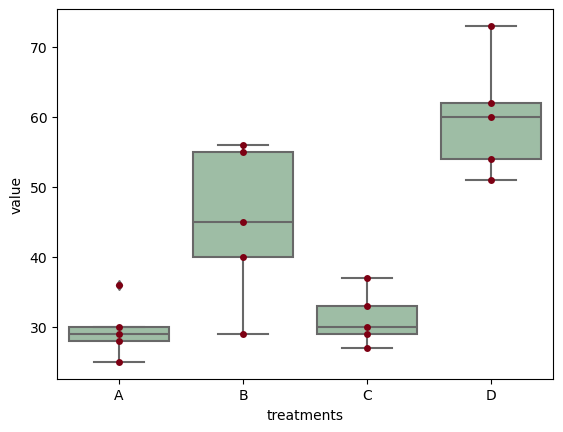

In [2]:
import pandas as pd
# load data file
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

In [4]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

17.492810457516338 2.639241146210922e-05


In [5]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),3010.95,3.0,17.49281,0.000026
Residual,918.00,16.0,NaN,NaN


In [7]:
!pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59055 sha256=75d1cf242d44c2db3e045a8b71a0652a2ea26b13148bed9fd85af22bdd706dc7
  Stored in directory: /Users/lyubi/Library/Caches/pip/wheels/17/b1/27/a08cd47cae31d28f2dd8951e3e2fe78e9ce3f8ee93afe01906
Successfully built bioinfokit


In [8]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,3010.95,1003.650,17.49281,0.000026
Residual,16.0,918.00,57.375,NaN,NaN


In [ ]:
# Performance when each of the engine 
#Step 1: Creating data groups.

performance1 = [89, 89, 88, 78, 79]
performance2 = [93, 92, 94, 89, 88]
performance3 = [89, 88, 89, 93, 90]
performance4 = [81, 78, 81, 92, 82]

Step 2: Conduct the one-way ANOVA:

Python provides us f_oneway() function from SciPy library using which we can conduct the One-Way ANOVA.

In [9]:

# Conduct the one-way ANOVA
f_oneway(performance1, performance2, performance3, performance4)


F_onewayResult(statistic=4.625000000000002, pvalue=0.016336459839780215)

Analyse the result:

The F statistic and p-value turn out to be equal to 4.625 and 0.016336498 respectively. Since the p-value is less than 0.05 hence we would reject the null hypothesis. This implies that we have sufficient proof to say that there exists a difference in the performance among four different engine oils. 


In [10]:
# Importing libraries 
import numpy as np 
import pandas as pd 

# Create a dataframe 
dataframe = pd.DataFrame({'Fertilizer': np.repeat(['daily', 'weekly'], 15), 
                        'Watering': np.repeat(['daily', 'weekly'], 15), 
                        'height': [14, 16, 15, 15, 16, 13, 12, 11, 14, 
                                        15, 16, 16, 17, 18, 14, 13, 14, 14, 
                                        14, 15, 16, 16, 17, 18, 14, 13, 14, 
                                        14, 14, 15]}) 


In [14]:
# Importing libraries 
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

model = ols('height ~ C(Fertilizer) + C(Watering) + \
            C(Fertilizer):C(Watering)', 
            data=dataframe).fit() 

result = sm.stats.anova_lm(model, type=2) 
 
print(result) 

                             df     sum_sq   mean_sq         F    PR(>F)
C(Fertilizer)               1.0   0.033333  0.033333  0.012069  0.913305
C(Watering)                 1.0   1.421614  1.421614  0.514722  0.479045
C(Fertilizer):C(Watering)   1.0   0.223698  0.223698  0.080994  0.778049
Residual                   28.0  77.333333  2.761905       NaN       NaN


# F-test 

In [16]:
import numpy as np
import scipy.stats as stats

# Create the data for two groups
group1 = np.random.rand(50)
group2 = np.random.rand(55)

# Calculate the sample variances
variance1 = np.var(group1, ddof=1)
variance2 = np.var(group2, ddof=1)

In [18]:
# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(group1) - 1
df2 = len(group2) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)


Degree of freedom 1: 49
Degree of freedom 2: 54
F-statistic: 1.0579922456799777
p-value: 0.5814735012788873
